In [78]:
#CSV #1 household_power_consumption.csv
#Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
#16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000

#CSV #2 sceaux_hourly_temperatures.csv
#time;temp;dwpt;rhum;prcp;snow;wdir;wspd;wpgt;pres;tsun;coco
#2006-12-16 00:00:00;6.0;3.0;81.0;;;210.0;14.8;;1023.9;;

import pandas as pd
import math as math

# Load the data
power = pd.read_csv('household_power_consumption.csv', delimiter=';', low_memory=False)
temp = pd.read_csv('sceaux_hourly_temperatures.csv', delimiter=';', low_memory=False)

# Limit data to first 100 rows
power = power.head(30000)
temp = temp.head(30000)

# leave only date, time, global_active_power and sub_metering_* columns
power = power[['Date', 'Time', 'Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# parse numeric columns
power['Global_active_power'] = pd.to_numeric(power['Global_active_power'], errors='coerce')
power['Sub_metering_1'] = pd.to_numeric(power['Sub_metering_1'], errors='coerce')
power['Sub_metering_2'] = pd.to_numeric(power['Sub_metering_2'], errors='coerce')
power['Sub_metering_3'] = pd.to_numeric(power['Sub_metering_3'], errors='coerce')

# group data by hour and calculate the sum of active power and sub_metering_* columns


# calculate 1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
power['active_energy'] = power['Global_active_power']
power['hour_float'] = power['Time'].apply(lambda x: float(x.split(':')[0])) + power['Date'].apply(lambda x: float(x.split('/')[0]))/60 * 6.28 / 24
power['hour_float_cos'] = power['hour_float'].apply(lambda x: math.cos(x))
# get 10 random rows
power.sample(10)




,Date,Time,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy,hour_float,hour_float_cos
18490,29/12/2006,13:34:00,1.438,0.0,0.0,18.0,1.438,13.126472,0.847201
26553,4/1/2007,03:57:00,2.372,0.0,0.0,0.0,2.372,3.017444,-0.992304
12682,25/12/2006,12:46:00,2.322,12.0,0.0,0.0,2.322,12.109028,0.897229
11132,24/12/2006,10:56:00,2.580,0.0,1.0,16.0,2.580,10.104667,-0.777643
11512,24/12/2006,17:16:00,1.660,0.0,0.0,0.0,1.660,17.104667,-0.173215
24642,2/1/2007,20:06:00,2.728,0.0,0.0,17.0,2.728,20.008722,0.400104
22201,1/1/2007,03:25:00,2.558,0.0,0.0,0.0,2.558,3.004361,-0.990599
16653,28/12/2006,06:57:00,0.240,0.0,0.0,0.0,0.240,6.122111,0.987056
28759,5/1/2007,16:43:00,1.572,0.0,0.0,18.0,1.572,16.021806,-0.951154
10645,24/12/2006,02:49:00,2.530,0.0,2.0,0.0,2.530,2.104667,-0.508869


-0.1617187209164133

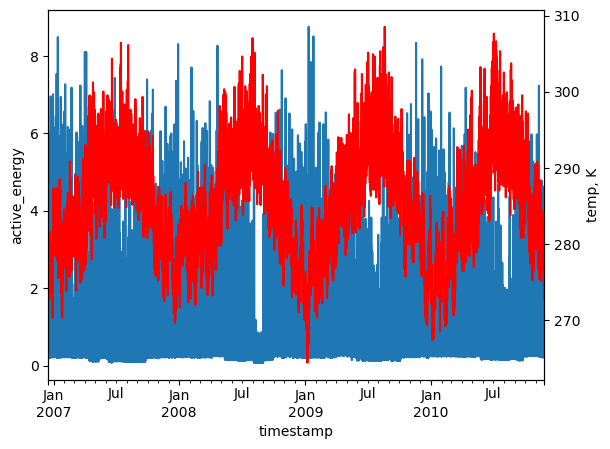

In [64]:

# Convert the date and time columns to datetime
power['timestamp'] = pd.to_datetime(power['Date'] + ' ' + power['Time'], format='%d/%m/%Y %H:%M:%S')
temp['timestamp'] = pd.to_datetime(temp['time'], format='%Y-%m-%d %H:%M:%S')
temp['kelvins'] = temp['temp'] + 273.15

# merge the two dataframes by timestamp
data = pd.merge(power, temp, on='timestamp', how='inner')
data

# plot timeseries with active_energy and temp columns (different axes)
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
data.plot(x='timestamp', y='active_energy', ax=ax1, legend=False)
ax2 = ax1.twinx()
data.plot(x='timestamp', y='kelvins', ax=ax2, color='r', legend=False)
ax1.set_ylabel('active_energy')
ax2.set_ylabel('temp, K')
# plt.show()

data['active_energy'].corr(data['kelvins'])